Faire un for chaque dossier dans dossier movies (chaque genre), for chaque file dans le dossier de ce genre, readlines

In [24]:
import os
import re
import pandas as pd

path = "./data/dialogs_movies"
regex_speaker_in_doc=[]
regex_speech_in_doc=[]
filename=[]
gender=[]
for folder in os.listdir(path):


    #print(folder)
    for file in os.listdir(path+"/"+folder):
        #print(file)
        with open("../2021_22/data/dialogs_movies/" + folder + "/" + file, "r") as f :
            document = f.read()
            gender.append(folder)
            filename.append(file)

        regex_speaker = re.compile("[A-Z]{3}.+")
        regex_speaker_in_doc.append(regex_speaker.findall(document))

        regex_speech = re.compile("(^[A-Z]{3}.+\n\n)(.+\n\n)+?(?=[A-Z]{3}.+)")
        regex_speech_in_doc.append(regex_speech.findall(document))

#regex_speaker_in_doc_df = pd.DataFrame(regex_speaker_in_doc, regex_speech_in_doc,
                                       #columns = ["Speaker", "Speech"])

df_regex_test = pd.DataFrame({"Speech":pd.Series(regex_speech_in_doc),"Speaker":pd.Series(regex_speaker_in_doc), 'Filename':pd.Series(filename),'Gender':pd.Series(gender)}
                             )

#print(regex_speaker_in_doc_df)
df_regex_test

,Speech,Speaker,Filename,Gender
0,"[(REVISIONS:\n\n, 15th Green (2) 5/15/91\n\n)]","[REVISIONS:, NEWSIES, WALT DISNEY PICTURES, FI...",newsies_dialog.txt,Musical
1,[],"[BURLESQUE, BURLESQUE, TESS, TESS (CONT'D), TE...",burlesque_dialog.txt,Musical
2,[],[],marypoppins_dialog.txt,Musical
3,[(SWEENEY TODD: THE DEMON BARBER OF FLEET STRE...,[SWEENEY TODD: THE DEMON BARBER OF FLEET STREE...,sweeneytoddthedemonbarberoffleetstreet_dialog.txt,Musical
4,[],"[WHITE CHRISTMAS, WHITE CHRISTMAS"", GENERAL CA...",whitechristmas_dialog.txt,Musical
...,...,...,...,...
2493,"[(FADE IN:\n\n, 2.\n\n)]","[FADE IN:, CONTINUED), CHAIRMAN, LAWYER, CHAIR...",getawaythe_dialog.txt,Drama
2494,"[(MODERATOR\n\n, American women...\n\n)]","[MODERATOR, IRATE WOMAN, COOL WOMAN, SAD WOMAN...",midnightcowboy_dialog.txt,Drama
2495,"[(KILLING ZOE\n\n, Hotel Mondial.\n\n)]","[KILLING ZOE, CAB DRIVER, CAB DRIVER, CAB DRIV...",killingzoe_dialog.txt,Drama
2496,"[(THE CINCINNATI KID\n\n, Richard Jessup\n\n)]","[THE CINCINNATI KID, SHOOTING DRAFT - 1965, DE...",cincinnatikidthe_dialog.txt,Drama


In [24]:
from pywsd import disambiguate
import pandas as pd
from nltk.corpus import wordnet as wn

disambiguate_dialog_df = pd.DataFrame(disambiguate('I went to the bank to deposit my money'),
                                      columns = ["Word", "Synset"])

disambiguate_dialog_df

,Word,Synset
0,I,None
1,went,Synset('run_low.v.01')
2,to,None
3,the,None
4,bank,Synset('bank.n.09')
5,to,None
6,deposit,Synset('deposit.v.02')
7,my,None
8,money,Synset('money.n.03')


In [22]:
disambiguate_dialog_df["Word"]

0          I
1       went
2         to
3        the
4       bank
5         to
6    deposit
7         my
8      money
Name: Word, dtype: object

In [2]:
import senticnet

senticnet.senticnet['money']

[0,
 0.253,
 0.091,
 0,
 '#serenity',
 '#acceptance',
 'positive',
 0.172,
 'sticker',
 'dollar_sign',
 'monetary',
 'value',
 'money_value']

In [1]:
#disambiguiate string
from pywsd import disambiguate
import pandas as pd
#search in senticnet
import senticnet

disambiguate_dialog_df = pd.DataFrame(disambiguate('abandon I went to the bank to deposit my money'),
                                      columns = ["Word", "Synset"])


for word in disambiguate_dialog_df["Word"]:
    if word in senticnet.senticnet:
        print(senticnet.senticnet[word])
    else:
        print("not found")

[-0.553, 0, -0.349, 0, '#sadness', '#disgust', 'negative', -0.451, 'uncalled_for', 'unwant', 'unfriendless', 'cast_off', 'unwelcome']
not found
not found
not found
not found
not found
not found
[-0.917, 0, -0.795, 0, '#grief', '#loathing', 'negative', -0.856, 'impudent', 'alluvial', 'brash', 'rock', 'insensitive']
not found
[0, 0.253, 0.091, 0, '#serenity', '#acceptance', 'positive', 0.172, 'sticker', 'dollar_sign', 'monetary', 'value', 'money_value']


In [23]:
#disambiguiate string
from pywsd import disambiguate
import pandas as pd
#search in senticnet
import senticnet

disambiguate_dialog_df = pd.DataFrame(disambiguate('abandon I went to the bank to deposit my money abashment hello'),
                                      columns = ["Word", "Synset"])

list_1st_emotion = []
list_2nd_emotion = []
for word in disambiguate_dialog_df["Word"]:
    word_low = word.lower()
    if word_low in senticnet.senticnet.keys():
        list_1st_emotion.append(senticnet.senticnet[word_low][4])
        list_2nd_emotion.append(senticnet.senticnet[word_low][5])
    else:
        list_1st_emotion.append("not found")
        list_2nd_emotion.append("not found")

disambiguate_dialog_df["1st Emotion"] = list_1st_emotion
disambiguate_dialog_df["2nd Emotion"] = list_2nd_emotion

print(disambiguate_dialog_df)

         Word                    Synset 1st Emotion  2nd Emotion
0     abandon   Synset('wildness.n.01')    #sadness     #disgust
1           I                      None   not found    not found
2        went    Synset('run_low.v.01')   not found    not found
3          to                      None   not found    not found
4         the                      None   not found    not found
5        bank       Synset('bank.n.09')   not found    not found
6          to                      None   not found    not found
7     deposit    Synset('deposit.v.02')      #grief    #loathing
8          my                      None   not found    not found
9       money      Synset('money.n.03')   #serenity  #acceptance
10  abashment  Synset('abashment.n.01')    #dislike         None
11      hello      Synset('hello.n.01')   not found    not found


In [25]:
#disambiguiate string
from pywsd import disambiguate
import pandas as pd
#search in senticnet
import senticnet
from nltk.corpus import wordnet as wn
import re

disambiguate_dialog_df = pd.DataFrame(disambiguate('abandon I went to the bank to deposit my money abashment the Russian Republican Army, secured we legitimize terror Gentlemen, welcome to Air Force One.'),
                                      columns = ["Word", "Synset"])

list_1st_emotion = []
list_2nd_emotion = []
for word in disambiguate_dialog_df["Word"]:
    if word in senticnet.senticnet.keys():
        list_1st_emotion.append(senticnet.senticnet[word][4])
        list_2nd_emotion.append(senticnet.senticnet[word][5])
    elif word in senticnet.senticnet.values():
        list_1st_emotion.append(senticnet.senticnet[word][4])
        list_2nd_emotion.append(senticnet.senticnet[word][5])
    elif word not in senticnet.senticnet.keys() and senticnet.senticnet.values():
        for synset in disambiguate_dialog_df["Synset"]:
            match_group_synset = str(re.search("(?<=Synset\()[^)]+", str(synset)))
            synonym = wn.synset(match_group_synset)
            disambiguate_dialog_df["Synonyme"] = synonym.hypernyms()
    else:
        list_1st_emotion.append("not found")
        list_2nd_emotion.append("not found")

disambiguate_dialog_df["1st Emotion"] = list_1st_emotion
disambiguate_dialog_df["2nd Emotion"] = list_2nd_emotion

print(disambiguate_dialog_df)

ValueError: invalid literal for int() with base 10: '01\'">'

In [17]:
synonym = wn.synset("run_low.v.01")
print(synonym)
print(synonym.hypernyms())
#disambiguate_dialog_df["Synonyme"] = synonym.synonyms()

Synset('run_low.v.01')
[Synset('end.v.01')]


In [4]:
import re

match_group = re.search("(?<=Synset\()[^)]+", "Synset('abashment.n.01')")

print(match_group.group())

'abashment.n.01'


In [21]:
from nltk.corpus import wordnet as wn

dog = wn.synsets('dog')[0].name()

dog

#dog.name()

'dog.n.01'

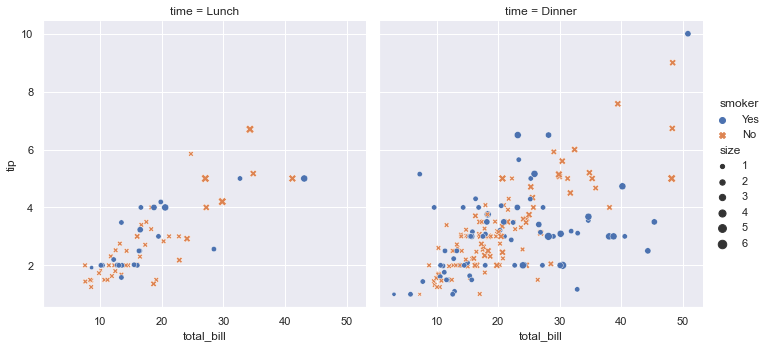

In [3]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")

# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

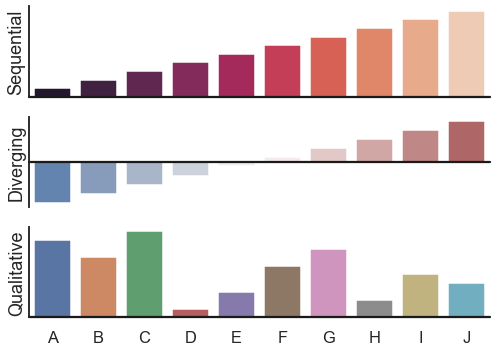

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", context="talk")
rs = np.random.RandomState(8)

# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 5), sharex=True)

# Generate some sequential data
x = np.array(list("ABCDEFGHIJ"))
y1 = np.arange(1, 11)
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Sequential")

# Center the data to make it diverging
y2 = y1 - 5.5
sns.barplot(x=x, y=y2, palette="vlag", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Diverging")

# Randomly reorder the data to make it qualitative
y3 = rs.choice(y1, len(y1), replace=False)
sns.barplot(x=x, y=y3, palette="deep", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Qualitative")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)